<a href="https://colab.research.google.com/github/MadhavReddy2213/Capstone-Project/blob/main/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [ ]:
data=pd.read_csv("/content/garments_worker_productivity.csv")

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# Data cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

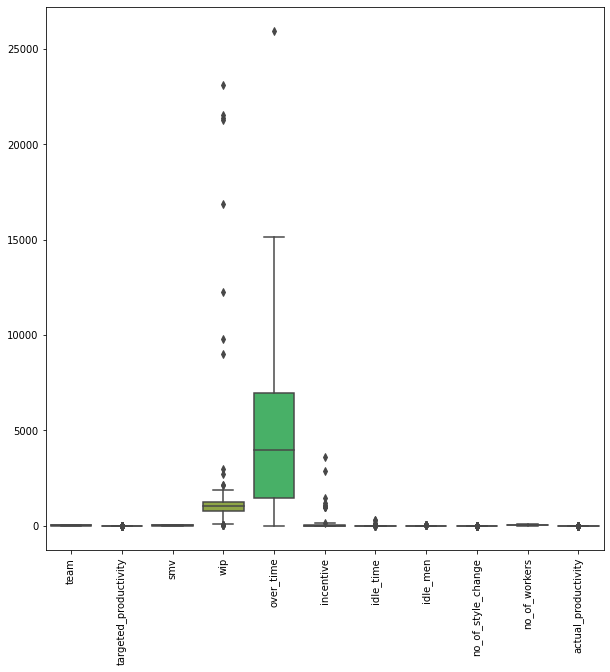

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.8)
plt.xticks(rotation=90)

In [ ]:
data.drop(['date'],axis=1,inplace=True)

In [ ]:
Q1 = datai.over_time.quantile(0.25)
Q3 = datai.over_time.quantile(0.75)
Q1 , Q3

NameError: ignored

In [ ]:
data.isna().sum()

In [ ]:
data['department'].value_counts()

In [ ]:
Q1 = data.incentive.quantile(0.25)
Q3 = data.incentive.quantile(0.75)
Q1, Q3

In [ ]:
data['day'].value_counts()

In [ ]:
data.department.unique()

In [ ]:
data["department"].replace('finishing ','finishing',inplace=True)

In [ ]:
data.department.unique()

In [ ]:
data['quarter'].value_counts()

In [ ]:
data['team'].value_counts()

In [ ]:
data['wip'].fillna(0,inplace=True)

In [ ]:
data["department"].replace('sweing','sewing',inplace=True)

In [ ]:
t_vs_a = ['targeted_productivity', 'actual_productivity']
data[t_vs_a].describe()

# EDA


In [ ]:
sns.histplot(data=data[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

In [ ]:
data.iloc[:, 1:5].apply(pd.Series.value_counts).plot.pie(subplots=True, layout=(2, 5), figsize=(20, 10), sharex = False, legend = False)

In [ ]:
sns.barplot(x='department', y='actual_productivity', data=data);

In [ ]:
sns.barplot(x='team', y='actual_productivity', data=data);

In [ ]:
c = data.groupby('quarter')['quarter'].count()

In [ ]:
c

In [ ]:
sns.barplot(x=c.index, y=c.values)

In [ ]:
i_vs_a = ['incentive', 'actual_productivity']
data[i_vs_a].describe()

In [ ]:
sns.barplot(x='incentive',y='actual_productivity',data=data)

In [ ]:
sns.barplot(x='day',y='actual_productivity',data=data)

In [ ]:
data["quarter"].replace('Quarter1',0,inplace=True)
data["quarter"].replace('Quarter2',0,inplace=True)
data["quarter"].replace('Quarter3',0,inplace=True)
data["quarter"].replace('Quarter4',1,inplace=True)
data["quarter"].replace('Quarter5',1,inplace=True)

In [ ]:
data["day"].replace('Monday',0,inplace=True)
data["day"].replace('Tuesday',0,inplace=True)
data["day"].replace('Wednesday',0,inplace=True)
data["day"].replace('Thursday',0,inplace=True)
data["day"].replace('Sunday',1,inplace=True)
data["day"].replace('Saturday',1,inplace=True)

In [ ]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

In [ ]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

In [ ]:
data[(data.incentive<lower_limit)|(data.incentive>upper_limit)]

In [ ]:
datai = data[(data.incentive>lower_limit)&(data.incentive<upper_limit)]

In [ ]:
datai.shape

In [ ]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

In [ ]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

In [ ]:
datai[(datai.over_time<lower_limit)|(datai.over_time>upper_limit)]

In [ ]:
datao = datai[(datai.over_time>lower_limit)&(datai.over_time<upper_limit)]

In [ ]:
datao.shape

In [ ]:
Q1 = datao.wip.quantile(0.25)
Q3 = datao.wip.quantile(0.75)
Q1 , Q3

In [ ]:
Inter_quartile_range = Q3 - Q1
Inter_quartile_range

In [ ]:
lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

In [ ]:
datao[(datao.wip<lower_limit)|(datao.wip>upper_limit)]

In [ ]:
dataw = datao[(datao.wip>lower_limit)&(datao.wip<upper_limit)]

In [ ]:
plt.figure(figsize=(10,7))
p = sns.boxplot(data = dataw, orient = 'v',width=0.8)
plt.xticks(rotation=90)

In [ ]:
#EDA

In [ ]:
sns.barplot(x='day',y='over_time',data=data)

In [ ]:
sns.barplot(x='day',y='idle_time',data=data)

In [ ]:
corr_data=dataw.iloc[:,:].corr()
plt.figure(figsize=(10,5),dpi=96)
sns.heatmap(data = corr_data,annot = True,cmap = 'coolwarm')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm = smf.ols(formula='actual_productivity~ department + no_of_workers + over_time  +incentive  + day + idle_time +team + smv + targeted_productivity + idle_men +  no_of_style_change',data=dataw).fit()

In [ ]:
lm.params

In [ ]:
x=dataw.drop(['actual_productivity','department'],axis=1)

In [ ]:
y=dataw.actual_productivity

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
lm1=LinearRegression()

In [ ]:
from sklearn import metrics

In [ ]:
lm1.fit(x_train, y_train)
y_pred = lm1.predict(x_test)
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

In [ ]:
lm1.score(x,y)

In [ ]:
lm.rsquared

In [ ]:
lm.summary()

In [ ]:
x_axis = data['team'].unique()
y_axis=[]
for val in x_axis:
    y_axis.append(data['over_time'][data['team'] == val].mean())
sns.barplot(x=x_axis, y=y_axis)
plt.title("Team and Overtime")
plt.xlabel('Team')
plt.ylabel('Average Overtime')
plt.show()

In [ ]:
dataw

In [ ]:
dataw['department'] = dataw['department'].astype('str')

In [ ]:
dataw.dtypes

# Train-test split


# Neural Networks

In [ ]:
dataw["department"].replace('sewing',0,inplace=True)
dataw["department"].replace('finishing',1,inplace=True)

In [ ]:
dataw.dtypes

In [ ]:
dataw.info()

In [ ]:
x=dataw.drop(['actual_productivity'],axis=1)

In [ ]:
y=dataw.actual_productivity

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)

#Step 1:Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(9),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

#Step 2:Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

#Step 3:Fit the model

history= model.fit(x_train, y_train, epochs= 4000, verbose=0)


In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Bagging

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics as metrics

In [ ]:
clf = BaggingRegressor(n_estimators = 200,
                       max_samples = 0.8,
                       random_state = 42)

In [ ]:
a = clf.fit(x_train, y_train)